Global variables to define robot's configuration space 

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import math
import random

#global variables 

#boundaries of environment
YMAX = 100 
XMAX = 100 

#list of obstacle objects
obstacles = []

#initial state of robot
init_x = 5
init_y = 5 
init_theta = 90

#end state of robot
final_x = 60
final_y = 80
final_theta = 0

#searched coordinates 
coordinates = []


Classes used to create objects of different things within the configuration space 

In [0]:

class robot():
  def __init__(self, x, y, theta):
    self.x = x
    self.y = y 
    self.theta = theta 
  def get_x(self):
    return self.x
  def get_y(self):
    return self.y
  def get_theta(self):
    return self.theta 
  def set_coordinates(self, x2, y2, theta2): 
    self.x = x2
    self.y = y2 
    self.theta = theta2
# we assume all obstacles are to be bounded as a rectangle 
# this takes the four corners of the robot in order of: 
# D ____ C 
# |      |
# A ____ B 
class rect_obstacle(): 
  def __init__(self, corner1 = [0,0], corner2 = [5,0], corner3 = [5,5], corner4 = [0,5]):
    self.A = corner1
    self.B = corner2
    self.C = corner3
    self.D = corner4

#we found a mathematical formula based on using dot product to determine of a point is inside a rectangle 
#our reference is here: 
#https://stackoverflow.com/questions/2752725/finding-whether-a-point-lies-inside-a-rectangle-or-not
  def hit_obstacle(self,x,y):

    #we only need three points bc from AB and BC we can draw CD and DA based on rectangle's 
    #perpendicular properties 
    #we also added a little bit around each obstacle as a safety zone for the car 
    AA = (self.A[0] - 5, self.A[1] - 5)
    BB = (self.B[0] + 5, self.B[1] - 5)
    CC = (self.C[0] + 5, self.C[1] + 5)

    AB = [(BB[0]-AA[0]),(BB[1]-AA[1])]
    BC = [(CC[0]-BB[0]),(CC[1]-BB[1])] 
    dotABAB = AB[0]**2 + AB[1]**2 
    dotBCBC = BC[0]**2 + BC[1]**2

    AM = [(x-AA[0]),(y-AA[1])]
    BM = [(x-BB[0]),(y-BB[1])]  
    dotABAM = (AB[0]*AM[0]) + (AB[1]*AM[1])
    dotBCBM = (BC[0]*BM[0]) + (BC[1]*BM[1])

    if(0 <= dotABAM <= dotABAB):
      if(0 <= dotBCBM <= dotBCBC):
        return True 
    return False

#this is for drawing the obstacle in the configuration space 
  def plot_obstacle(self): 
    #separate the four corners A, B, C, and D into the lines AB, BC, CD, and DA 
    x1 = [self.A[0], self.B[0]]
    x2 = [self.B[0], self.C[0]]
    x3 = [self.C[0], self.D[0]]
    x4 = [self.D[0], self.A[0]]

    y1 = [self.A[1], self.B[1]]
    y2 = [self.B[1], self.C[1]]
    y3 = [self.C[1], self.D[1]]
    y4 = [self.D[1], self.A[1]]
#use the matlob plot function
    plt.plot(x1,y1,color="red",label="Obstacle")
    plt.plot(x2,y2,color="red")
    plt.plot(x3,y3,color="red")
    plt.plot(x4,y4,color="red")
    
#coords or coordinates are the (x,y) of the robot's state 
#these objects are collected into a coordinates array
class coords(): 
  def __init__(self, x=0, y=0, previous=-1):
    self.x = x
    self.y = y 
    #index of the previous coordinate that directly proceeds this coord 
    #this so the tree can remain connected and paths can be mapped 
    #this number is -1 if it is a starting coordinate 
    self.previous = previous 
  def get_coordinates(self):
    return (self.x,self.y)
  def get_previous(self): 
    return self.previous
  def set_coordinates(self, coordinates):
    self.x = coordinates[0]
    self.y = coordinates[1]
  def set_previous(self, previous):
    self.previous = previous 



2.2A: Function plot_world creates the C-space visual using matlab python functions. It creates circles for the goal and initial state (because it assumes the robot is a circle). It creates the obstacles as rectangles.  It also creates a box of the environment (i.e. defines the environment's boundaries).   

In [0]:
#C-Space Visualization Function 
def plot_world(x_max=100, y_max=100, obs_list=[(30,30),(50,50),(30,50)],initial=[5,5],goal=[60,80]): 

  #create boundaries of the environment 
  XMAX = x_max 
  YMAX = y_max
  
  x1 = [0,x_max]
  y1 = [0,0]

  x2 = [x_max, x_max]
  y2 = [0, y_max]

  x3 = [x_max, 0]
  y3 = [y_max, y_max]

  x4 = [0, 0]
  y4 = [y_max, 0]

  fig, ax = plt.subplots() 
  ax.set(xlim=(-5,x_max+60), ylim=(-5,y_max+5))
  plt.plot(x1,y1,color="black")
  plt.plot(x2,y2,color="black")
  plt.plot(x3,y3,color="black")
  plt.plot(x4,y4,color="black")

  init_x = initial[0]
  init_y = initial[1]

  final_x = goal[0]
  final_y = goal[1]

  #create the start and goal states as circles 
  #plt.plot(init_x, init_y,'ro', color="blue", label="Initial State")
  init_circle = plt.Circle((initial[0], initial[1]), radius=5, color="blue", label="Initial State")
  ax.add_artist(init_circle)
  final_circle = plt.Circle((goal[0], goal[1]), radius=5, color="green", label="Goal State")
  ax.add_artist(final_circle)
  #plt.plot(final_x, final_y, 'ro', color="green", label="Goal State")

  #create the obstacles 
  global obstacles 
  obstacles.clear()
  for i in obs_list: 
    obstacles.append(rect_obstacle(corner1=[i[0],i[1]], corner2=[i[0]+10,i[1]], corner3=[i[0]+10,i[1]+10], corner4=[i[0],i[1]+10]))
  #obstacles = [,
   #            rect_obstacle(corner1=[60,60], corner2=[70,60], corner3=[70,70], corner4=[60,70])]

  for i in obstacles:
    i.plot_obstacle()
  
  #add a legend 
  two = plt.legend(loc='lower right')
  ax = plt.gca().add_artist(two)
  one = plt.legend(handles=[init_circle, final_circle], loc='upper right')
  plt.show()

  #print(obstacles)

#plot_world() 




2.2C: one_second_trajectory is the function that generates an achievable trajectory that lasts 1 second.  This uses the estimate that the car will move about 5cm per second. It uses similar triangle properties to create a triangle between the initial and target coordinates, and then compare it to a triangle where the hypotenuse is equal to 5 cm.  (If the initial and and target are within 5 cm the function returns (-1,-1) to say a trajectory could not be created).  (If the one second trajectory would create a collision, using the collision_free(initial, target) function, the function returns (-1,-1) as well). 

2.2d: collision_free(initial, target) is the function that determines if there is an obstacle in between two trajectories.  (The random points are generated within the bounds of the environment in another function so wall collisions are not considered here).  This is done by looking at every x,y (incremented by 1 cm) on the line drawn between initial and target and using the hit_obstacle function of the rect_obstacle class.  For every point (x,y) on the line between initial and target, every obstacle is checked to see if (x,y) collides with it.

2.2e: closest_to_target is the function that given a set of points V and a target point determines which point is closest.  V is a list of all the coordinates found by the RRT plannar and uses euclidean distance to determine the distances between all points V to target point. If all points are equidistance, the first in V is returned

2.2f: rrt function runs the RRT planner.  It takes in the number of iterations the planner will run while trying to reach the goal state.  It also starts in the start and end states.  It works by generate a random point that is within the C-space (ensuring that it does not go beyond the walls of the environment).  It takes a random point, finds the closest coordinate to this random point, and attempts to a one second trajectory towards it from the closest coordinate.  If the trajectory is valid it adds the next coordinate to its coordinates array (which represents a set of points V) and sets the closest coordinate as the previous coordinate. If the next coordinate is within resonable distance to the goal state (we set this at 2.5 bc we 5 cm as the robot's radius).   

In [0]:
#calculate the Eucledian distance between two points 
def trajectory_distance(initial,target):
  d = (target[0]-initial[0])**2 + (target[1]-initial[1])**2
  return math.sqrt(d)

#determines if there would be a collision with an obstacle between two points 
def collision_free(initial, target):

  global obstacles 
  #print("Collision free")
  #print(obstacles)
  traj_points = []
  
  traj_points.append((initial[0],initial[1]))
  traj_points.append((target[0],target[1]))
  
  #get all the points on the line between the initial coordinate and the target coordinate
  #take the distance and move by one unit from the initial until reaching the target 
  d = trajectory_distance(initial,target)
  d = int(d)
  
  for i in range(1,d):
    next_x = initial[0]+((i*(target[0]-initial[0]))/d)
    next_y = initial[1]+((i*(target[1]-initial[1]))/d)
    traj_points.append((next_x,next_y))
  
 # for i in traj_points:
  #  print(i[0])
   # print(i[1])

   #for every obstacle, check every point on the line and see if that point would hit the obstacle
  for j in obstacles: 
    for k in traj_points:
      if(j.hit_obstacle(x=k[0],y=k[1])):
        return False 
  
  return True

#print(trajectory_distance((0,0),(0,20)))
#print(collision_free((0,0),(20,20)))
    
#assumes the robot can move 5cm in one second approximately 
#if the distance between initial and target is greater than 5 cm, 
#it will calculate the point that is 5cm away from initial in direction of target 
#otherwise it will return invalid point (-1,-1) to indicate error 
def one_second_trajectory(initial, target):
  d = trajectory_distance(initial, target)
  if(d >= 5):
    next_x = initial[0]+((5*(target[0]-initial[0]))/d)
    next_y = initial[1]+((5*(target[1]-initial[1]))/d)
    if (collision_free(initial, (next_x, next_y)) == True):
      return (next_x,next_y)
  return (-1,-1)

#one_second_trajectory((53,53),(59,59))

#this function will calculate distance from the set of points V to target
#points are stored as coord objects 
#will return the coord with the smallest distance and its index in the set V 
def closest_to_target(V, target):
#check if V is valid set of points 
  if(len(V) <= 0):
    return -1 
#start with first entry of V
  closest = V[0]
  xy = V[0].get_coordinates()
  d = trajectory_distance(xy,target)
  counter = 0
  index = 0
 #for all points in V
  for i in V: 
    xy = i.get_coordinates()
    next_d = trajectory_distance(xy,target)
    #see if the distance is smaller than the current smallest distance found so far
    #if it is, set that coord as the smallest point
    if(next_d < d):
      closest = i
      d = next_d
      index = counter 
    counter += 1 
  #return the coord with the shortest distance to target and its index in the set 
  return (closest, index)

#attempts to get a random point that is within the boundaries of the environmen t
def get_point():
  x = random.randrange(0, XMAX)
  y = random.randrange(0, YMAX)
  return (float(x), float(y))

#this was used for testing to see if it would improve RRT -> did not help in the end
def get_better_point(): 
  x = random.randrange(-100, 200)
  y = random.randrange(-100, 200)

  while((x<5) or (x>95)):
    x = random.randrange(-100, 200)
  while ((y<5) or (y>95)):
    y = random.randrange(-100, 200)
  
  return (float(x), float(y))

#check if the point is within reason of being considered on the target
#as the robot has a radius of 5cm, if the point is within 5cm away from the target
#it is resonable to assume it has reached its goal 
def on_goal(point, target):

    d = trajectory_distance(point, target)
    if(d < 5):
      return True
    return False

#for a set of points V and a index of a coord in V, backtrack from that coord 
#each coord keeps the index of its previous coord
#this means that we can backtrack coords to get the full trajectory path 
def get_path(V, index):
  path = []
  counter = index 
  safety = 0 
  #print(V)
  #while there is still a previous coord (no previous means -1)
  while(counter != -1):
    #also double check that we dont go beyond size of V 
    if(safety >= len(V)):
      return path
    #add current coord to the path 
    curr_coord = V[counter]
    path.append(curr_coord)
    #get the previous coord 
    counter = curr_coord.get_previous()
    safety += 1 
  return path

#this will plot line for a path aka a set of assumed connected Coords 
def map_path(path, graph_color="purple", graph_label=False):
  x_arr = []
  y_arr = []
  #for all the coords in path 
  for i in path:
    #separate the x and y into two arrays for the matlab plot function 
    xy = i.get_coordinates()
    x_arr.append(xy[0])
    y_arr.append(xy[1])
  #use matlab plot to connect the coords 
  if(graph_label):
    plt.plot(x_arr, y_arr, color=graph_color, label="Trajectory")
  else: 
    plt.plot(x_arr, y_arr, color=graph_color)
  #return one point that can be used by another function for coloring and labeling 
  return (x_arr[0], y_arr[0])

#function for debugging coordintaes
#just plots every single coordinate in the path 
def dump_points(path):
  x_arr = []
  y_arr = []
  for i in path:
    xy = i.get_coordinates()
    x_arr.append(xy[0])
    y_arr.append(xy[1])
  
  plt.scatter(x_arr, y_arr, color="blue", label="All Points in V")

#this is how to map the entire RRT 
#for every coord, use map_path to create its trajectory 
#make it all one color so it seems connected even though it'll probably map over itself 
def dump_path(path):
  x_arr = []
  y_arr = []
  #get the first point 
  if(len(path) >= 1):
    xy = path[0].get_coordinates()
    x_arr.append(xy[0])
    y_arr.append(xy[1])
  #moving backwards
  for i in reversed(range(len(path)-1)):
    #for every single coord, create the trajectory 
    segment = get_path(path, i)
    #map the trajectory 
    map_path(path=segment, graph_color="gray", graph_label=False)
  #return a single point for coloring and labeling by another function 
  return (x_arr[0], y_arr[0])
  #plt.scatter(x_arr, y_arr, color="blue", label="Full RRT Evolution")

#this is to plot the final grid world with RRT and trajecotyr 
def plot_trajectories(path, coordinates, x_max=100, y_max=100, initial=[5,5],goal=[60,80]):
  #map boundaries of robot environment 
  XMAX = x_max 
  YMAX = y_max
  
  x1 = [0,x_max]
  y1 = [0,0]

  x2 = [x_max, x_max]
  y2 = [0, y_max]

  x3 = [x_max, 0]
  y3 = [y_max, y_max]

  x4 = [0, 0]
  y4 = [y_max, 0]

  fig, ax = plt.subplots() 
  ax.set(xlim=(-5,x_max+60), ylim=(-5,y_max+5))
  plt.plot(x1,y1,color="black")
  plt.plot(x2,y2,color="black")
  plt.plot(x3,y3,color="black")
  plt.plot(x4,y4,color="black")

  init_x = initial[0]
  init_y = initial[1]

  final_x = goal[0]
  final_y = goal[1]

  #map the initial and goal state 
  init_circle = plt.Circle((initial[0], initial[1]), radius=5, color="blue", label="Initial State")
  ax.add_artist(init_circle)
  final_circle = plt.Circle((goal[0], goal[1]), radius=5, color="green", label="Goal State")
  ax.add_artist(final_circle)

  #map every obstacle 
  global obstacles 
  for i in obstacles:
    i.plot_obstacle()

  #map the entire evolution of RRT by mapping every trajectory found 
  all_traj = dump_path(coordinates)
  plt.plot(all_traj[0], all_traj[1], color="grey", label="RTT Evolution")

  #map the specific path to be considered the final found trajectory 
  found_state = map_path(path)
  plt.plot(found_state[0], found_state[1], color="purple", label="Trajectory")
  #also map the last point of the trajectory to view how close it is to the goal 
  found_circle = plt.Circle((found_state[0],found_state[1]),radius=5, color="orange", label="Trajectory End State")
  ax.add_artist(found_circle)

  #label graph 
  plt.xlabel("Value of State's X (m)")
  plt.ylabel("Value of State's Y (m)")
  plt.title("Robot's Configuration Space with Trajectory")
  two = plt.legend(loc='lower right')
  ax = plt.gca().add_artist(two)
  one = plt.legend(handles=[init_circle, final_circle,found_circle], loc='upper right')
  plt.show()

#this is our main rrt function 
#it takes in the number of iterations, the start point, the end point, and a list of obstacle locations 
#it outputs a graph of the entire RRT evolution, best trajectory to towards the end 
def rrt(iterations, start, end, obstacle_list=[(25, 25), (55,55),(25,55)]):
  #first set up the world and print c-space before trajectories 
  plot_world(initial=start, goal=end, obs_list=obstacle_list)
  global obstacles 
  #print(obstacles) 
  #add initial as first coordinate 
  coordinates = [] 
  coordinates.append(coords(start[0],start[1],-1))
  #print(coordinates)
  guess_traj_index = 0
  guess_traj_distance = trajectory_distance(start, end) 
  target = (end[0], end[1])
  #run the algorithm for n iterations 
  for n in range(iterations):
    #get a random point in the C-space 
    random_xy = get_better_point()
    #print(random_xy)
    #find the closest point in V to the random point 
    closest = closest_to_target(coordinates, random_xy)
    #if(closest == -1):
      #continue
    #attempt to move towards the random point from the closest point 
    closest_xy = closest[0].get_coordinates()
    next_coord = one_second_trajectory(closest_xy, random_xy)
    #check if that move was valid
    if((next_coord[0]==-1) and (next_coord[1]==-1)):
      n = n-1 
      continue 
    #if it was, add the point to V 
    coordinates.append(coords(next_coord[0], next_coord[1], closest[1]))
    #check if the movement brought robot closer to goal
    #this is to pick the best trajectory towards the goal if the robot did not find
    #the goal in the number of iterations it ran 
    new_d = trajectory_distance(next_coord, end)
    if(new_d < guess_traj_distance):
      guess_traj_index = len(coordinates)-1
      guess_traj_distance = new_d
    if(on_goal(next_coord, end)):
      print("Reached Goal in ",n," iterations")
      #print(n)
      #path = get_path(coordinates, trajectory_index)
      break
  #print(coordinates)
  
  #print(path)
  #print the final c space with RRT evolution and trajectory 
  #print(guess_traj_index)
  #print(guess_traj_distance)
  path = get_path(coordinates, guess_traj_index)
  plot_trajectories(path=path,coordinates=coordinates, initial=start, goal=end)
  
  #map_path(path)
  #dump_points(coordinates)
  return path





2.2g: Here are multiple trajectories for different initial states.  We had 3 obstacles arranged as if it is a parking lot (as said in the specification). We ran three scnearios: 2 directly in between the two points, 1 directy in between, and 0 in between.  The first is to avoid all three obstacles, the second is to try and 'park' in an open space, and the last is to directly exit. 

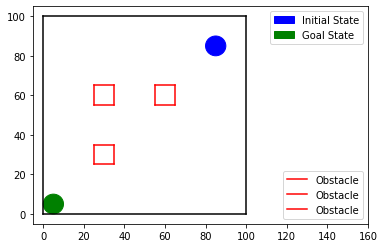

Reached Goal in  721  iterations


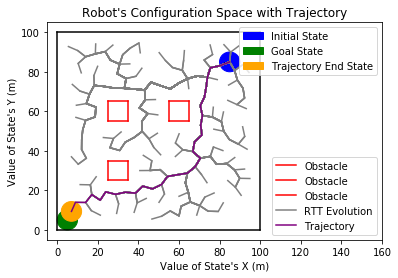

In [170]:
path1 = rrt(1000, start=[85,85], end=[5,5], obstacle_list=[(25, 25), (55,55),(25,55)])

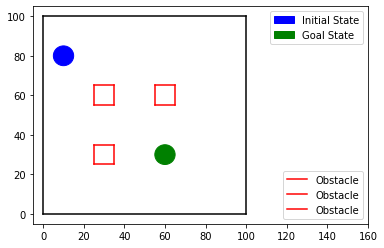

Reached Goal in  97  iterations


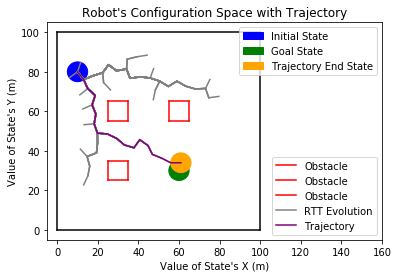

In [164]:
path2 = rrt(500, start=[10,80], end=[60,30])

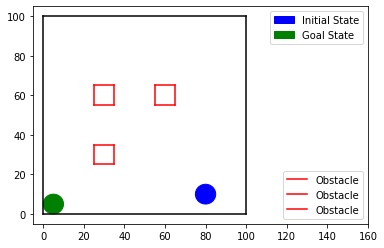

101
6.326229742616891


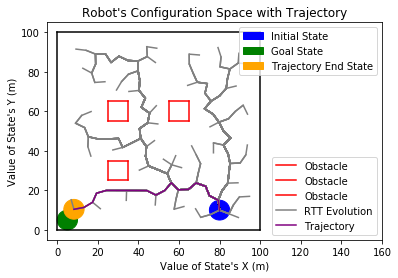

In [151]:
path3 = rrt(300,start=[80,10], end=[5,5])

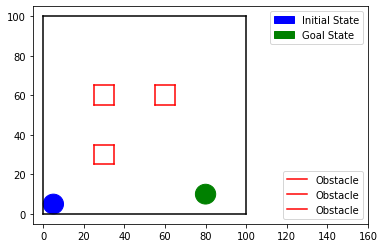

Reached Goal
208
100
2.9049660933383867


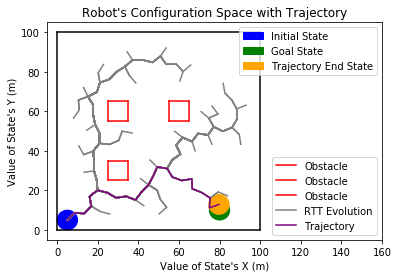

In [149]:
path4 = rrt(300,start=[5,5], end=[80,10])